<a href="https://colab.research.google.com/github/AdithyaaVenkatesh/Oasis_intern/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT 1 - LEVEL 2**

---

# **Predicting House Prices with Linear Regression**

## 1) Data Collection and preprocessing

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Housing.csv")

In [ ]:
print("Dataset Shape:", df.shape)  # Check dataset shape
print("Column Names:", df.columns)  # Check column names


Dataset Shape: (545, 15)
Column Names: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


In [ ]:
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                         1.0                              0.0   
1                         

In [ ]:
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min  

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_furnished         0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


In [ ]:
# Check all columns in the dataset
print(df.columns)



Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')


## 2) Data Exploration

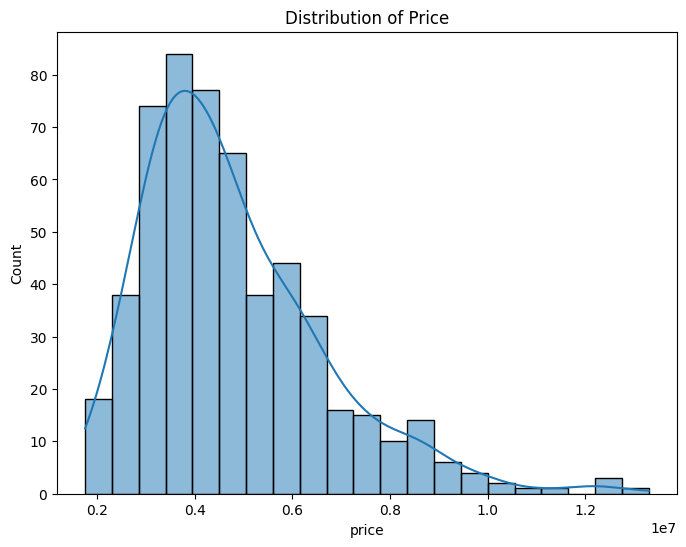

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df["price"], kde=True)
plt.title("Distribution of Price")
plt.show()

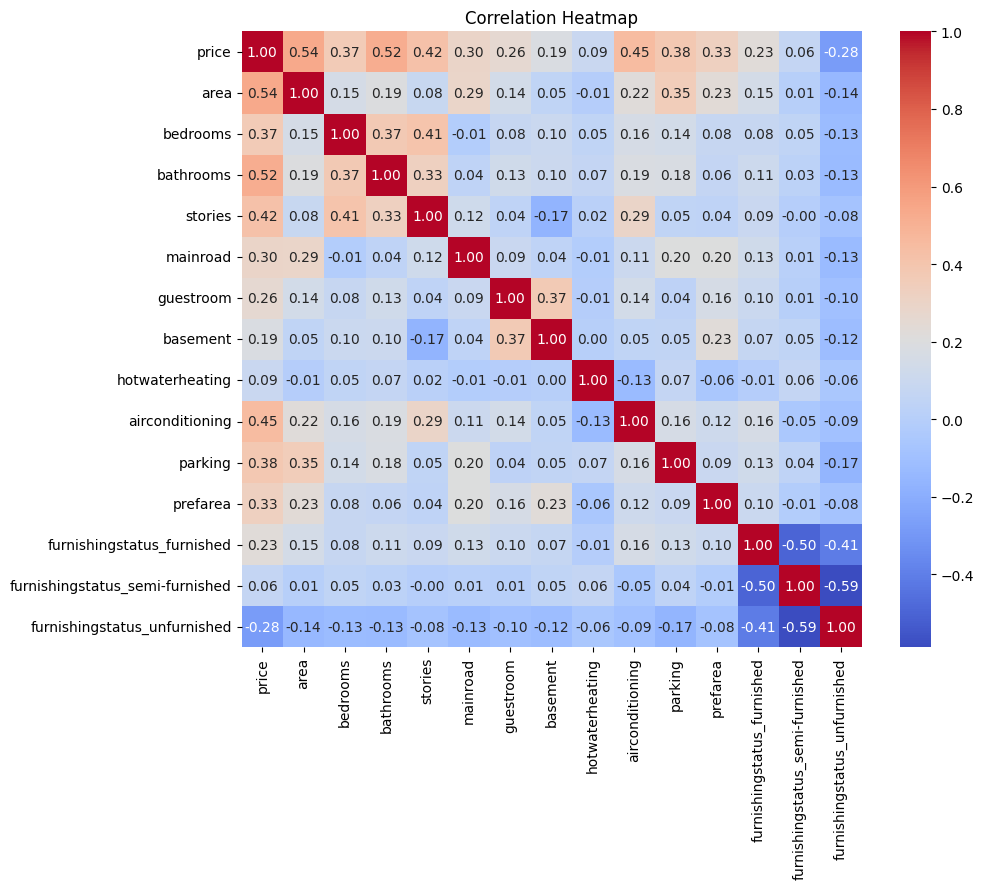

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

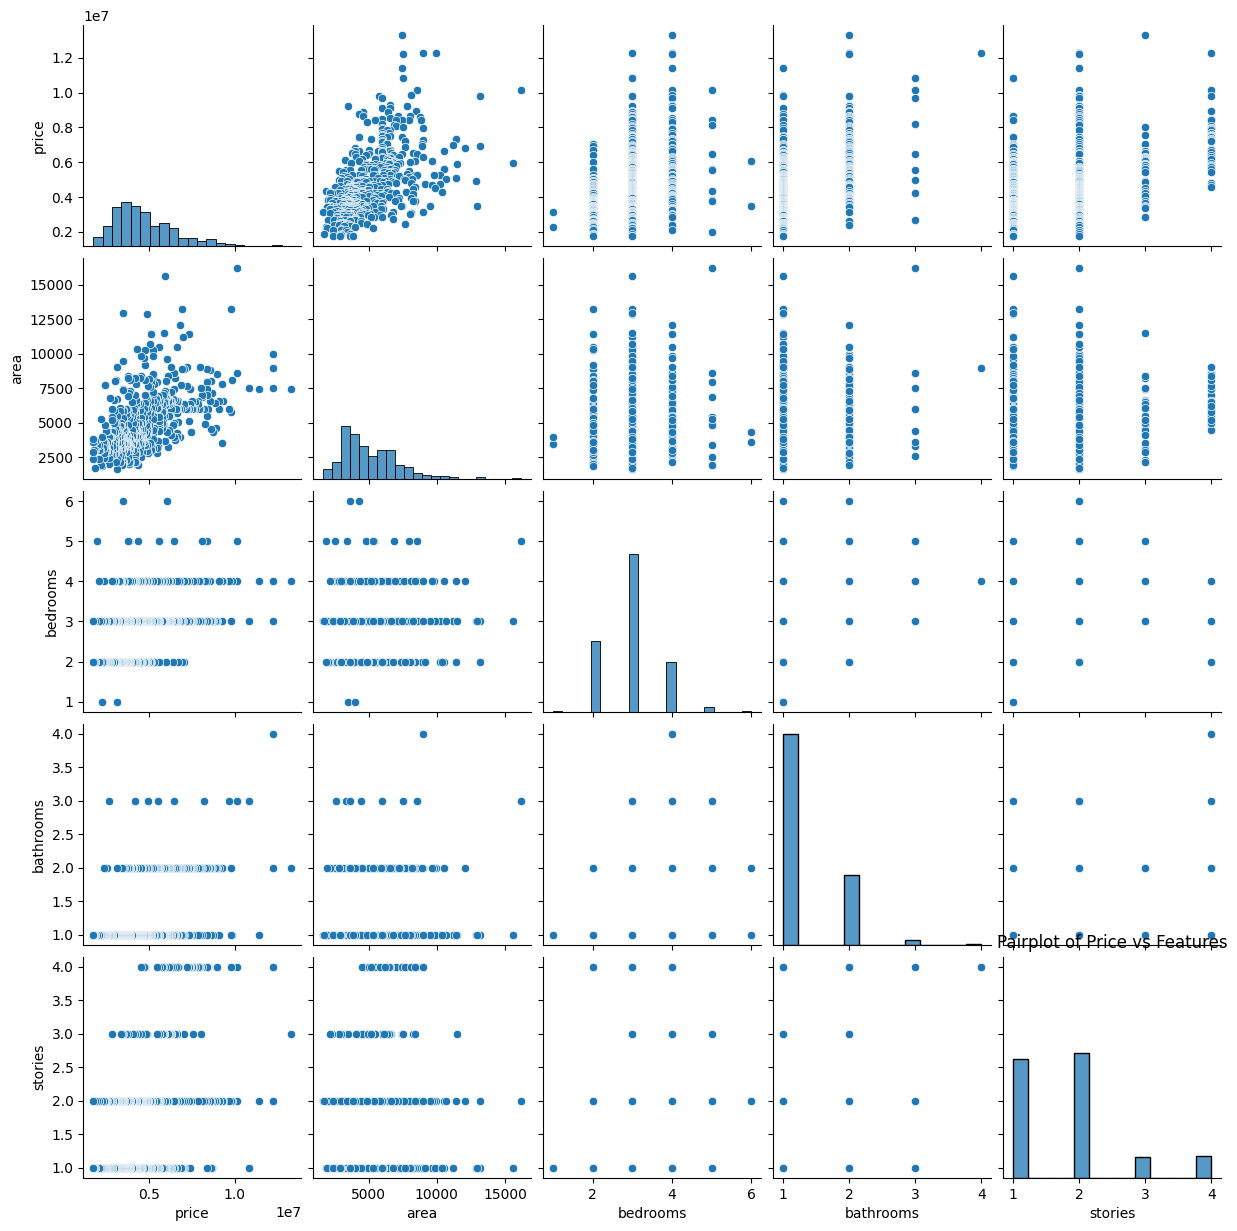

In [ ]:
# Visualize some feature relationships with price
sns.pairplot(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories']])
plt.title("Pairplot of Price vs Features")
plt.show()



In [ ]:
binary_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({"yes": 1, "no": 0}))

## 3) Feature Selection

In [ ]:
X = df.drop(columns=["price"])  # Features
y = df["price"]  # Target variable


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 4) Model Training

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
categorical_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [ ]:
ridge = Ridge()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_poly, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.61893e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.4956e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.64721e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.3503e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning:

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
best_alpha = grid_search.best_params_['alpha']
print(f"\nBest alpha: {best_alpha}")
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_poly, y_train)



Best alpha: 100


Ridge(alpha=100)

## 5) Model evaluation

In [ ]:
# Step 5: Evaluate the model
y_pred_ridge = ridge_model.predict(X_test_poly)

# Calculate MSE and R²
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"\nRidge Mean Squared Error: {mse_ridge}")
print(f"Ridge R-squared: {r2_ridge}")


Ridge Mean Squared Error: 1705917514394.8713
Ridge R-squared: 0.6624999888717619


## 6) visualization

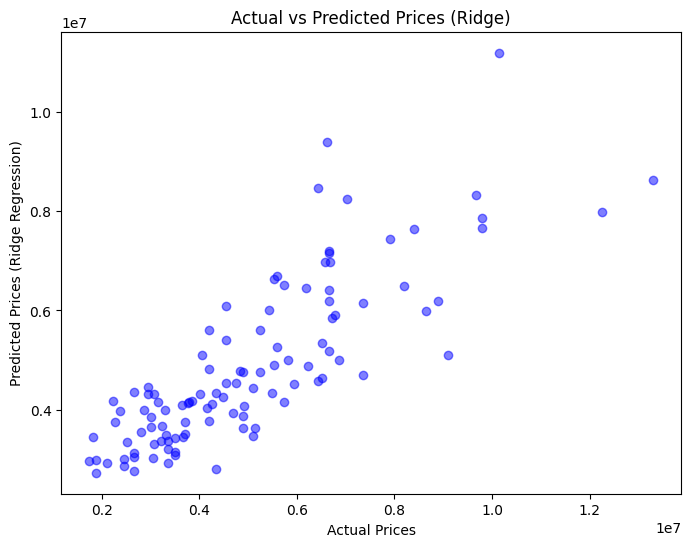

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Ridge Regression)")
plt.title("Actual vs Predicted Prices (Ridge)")
plt.show()